In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.layers import MaxPooling2D


## Loading Dataset

In [9]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-x-ray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-x-ray-pneumonia/chest_xray/val'
file_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'

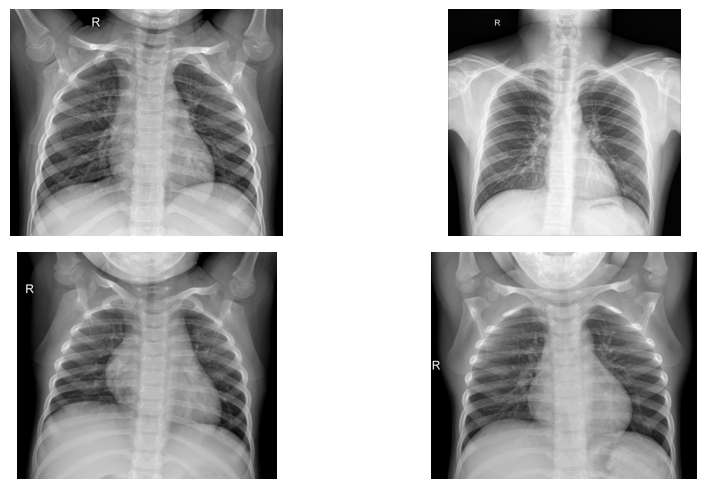

In [10]:
dir = os.listdir(file_path)

plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread(os.path.join(file_path, dir[random.randrange(0, len(dir))]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()

## Preprocessing Data

In [11]:
train_data_gen = ImageDataGenerator(rescale=1/255)
folder = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
train_gen = train_data_gen.flow_from_directory(
    folder, target_size=(150,150),batch_size=500, class_mode='binary')


Found 5216 images belonging to 2 classes.


## AI Model

##### Several layers used for feature capture of the image data. MaxPooling layer to reduce spatial dimensions and ```relu``` activation was used to include non-linearity so the neural network learns from complex data patterns.

In [17]:
model = models.Sequential(
    [
        # Fist layer
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3) ),
        layers.MaxPooling2D(),

        # Second convolution layer
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        # Third convolution layer
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        # Fourth layer
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
        
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_gen, steps_per_epoch=10, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7414 - loss: 0.6297
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7740 - loss: 0.5495
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7385 - loss: 0.5437
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8440 - loss: 0.4128
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8083 - loss: 0.3961
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9160 - loss: 0.2887
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8807 - loss: 0.2814
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9340 - loss: 0.1659
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9363 - loss: 0.1619
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9380 - loss: 0.1662


### Evaluating model on Test Images

In [18]:
images = []
label_map = {'NORMAL': 0, 'PNEUMONIA': 1}
true_labels = []
pred_labels = []

test_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
categories = ['NORMAL', 'PNEUMONIA']
for category in categories:
    file_path = os.path.join(test_data, category)
    for file_name in os.listdir(file_path)[:40]:
        path = os.path.join(file_path, file_name)
        test_image= image.load_img(path, target_size=(150,150))
        img_array = image.img_to_array(test_image) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
    # print(img_array)
        pred = model.predict(img_array, verbose=0)
    
        pred_class = 1 if pred > 0.5 else 0
    
    # Storing results
        images.append(test_image)
        true_labels.append(label_map[category])
        pred_labels.append(pred_class)
len(images)

80

### Predictions of images 

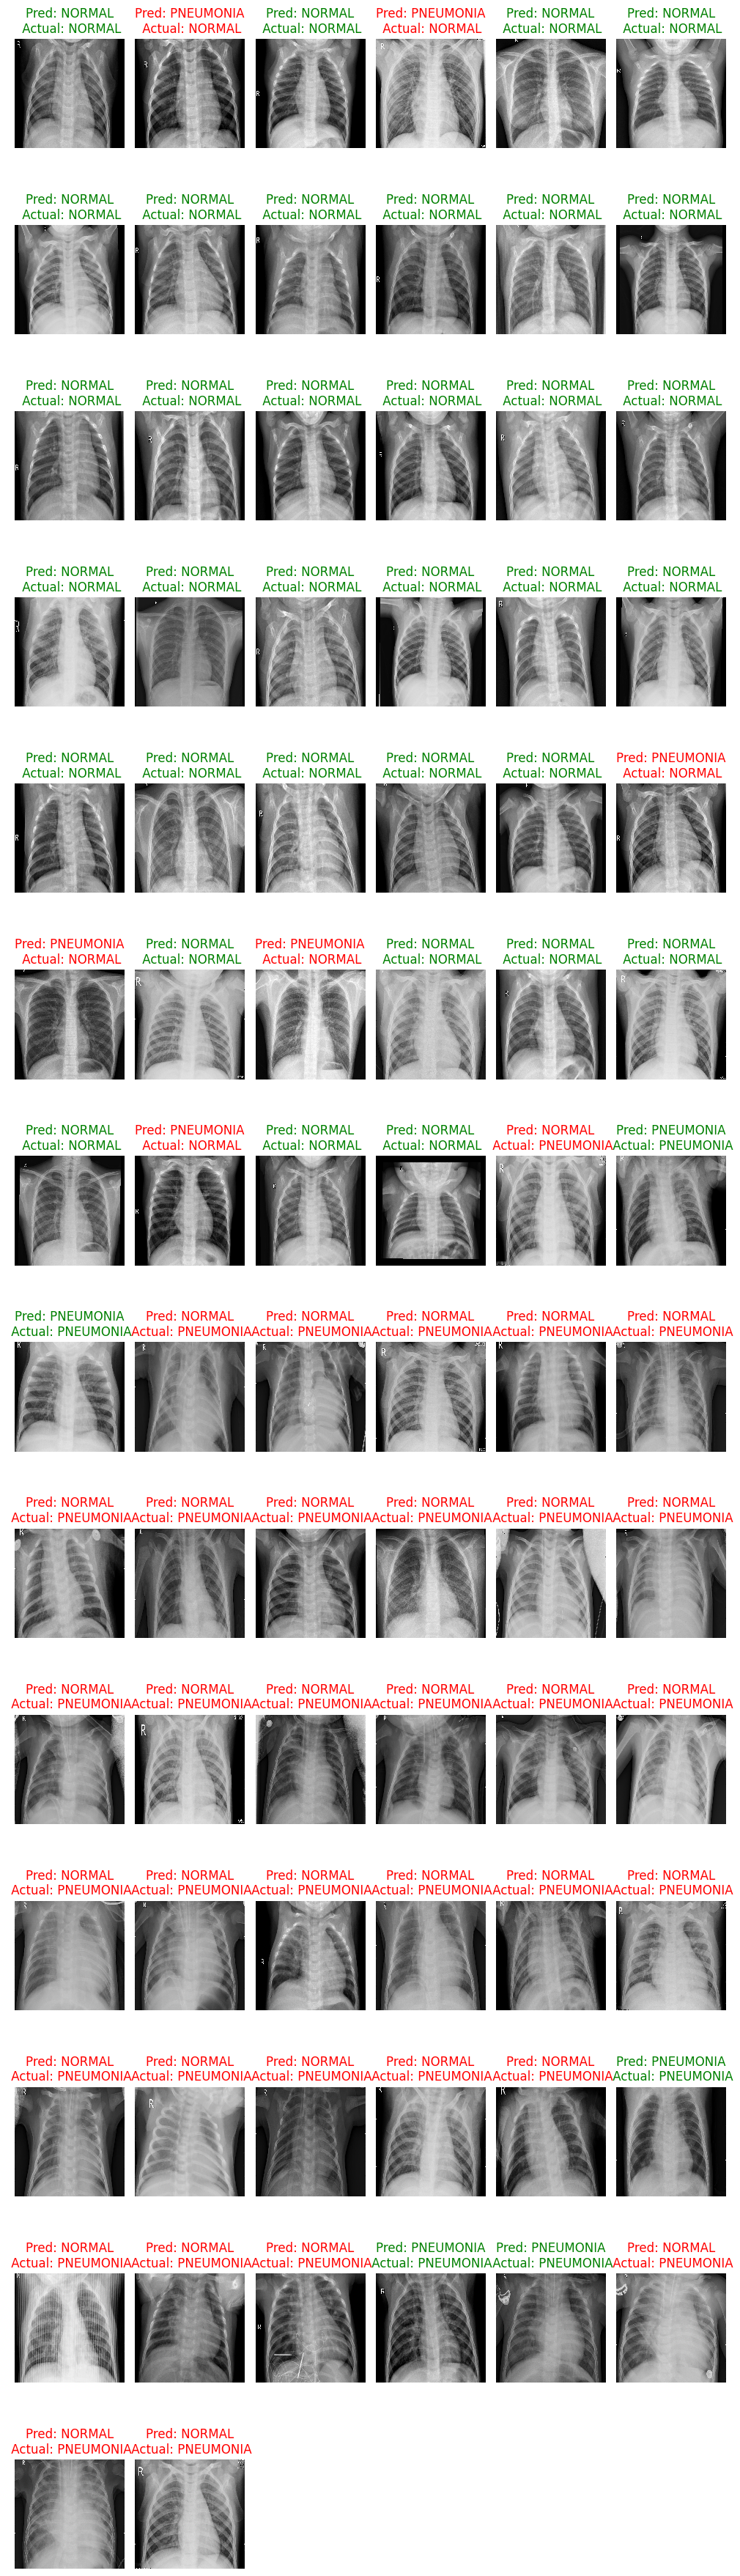

In [28]:
# num_col = 6
# num_rows = 2
import math
n_images = len(images)
n_col = 6
n_rows = math.ceil(n_images/n_col)

# num_images = num_col * num_rows
plt.figure(figsize=(10, 6*n_col))
for i in range(n_images):
    plt.subplot(n_rows, n_col, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    actual = 'PNEUMONIA'  if true_labels[i] == 1 else 'NORMAL'
    pred = 'PNEUMONIA' if pred_labels[i] == 1 else 'NORMAL'
    color = 'green' if actual == pred else 'red'
    plt.title(f'Pred: {pred}\n Actual: {actual}', color=color)
plt.tight_layout()
plt.show()